In [44]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 8.0 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 13.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ------- -------------------------------- 7.3/41.2 MB 37.8 MB/s eta 0:00:01
   ---------------- ----------------------- 16.5/41.2 MB 40.0 MB/s eta 0:00:01
   --------------------------- ------------ 28.0/41.2 MB 44.5 MB/s eta 0:00:01
   -------------------------------------- - 39.3/41.2 MB 47.2 MB/s eta 0:00:01
   ---------------------------------------- 41.2/4

In [2]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------- ----------------- 4.5/8.1 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 29.4 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 51.4 MB/s eta 0:00:00


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
import warnings 
warnings.simplefilter("ignore")

In [12]:
df = pd.read_csv("Hotel_Reservations.csv")

In [13]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
df.drop(['Booking_ID'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop_duplicates(inplace=True)

In [22]:
df["no_of_adults"].value_counts()

no_of_adults
2    18871
1     4800
3     2178
0      135
4       16
Name: count, dtype: int64

In [24]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    18558
Canceled         7442
Name: count, dtype: int64

Imbalanced Data

In [25]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [29]:
len(num_cols)

12

In [26]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

In [31]:
len(cat_cols)

6

Univariate Analysis

In [32]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")

        axes[i][1].set_title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()







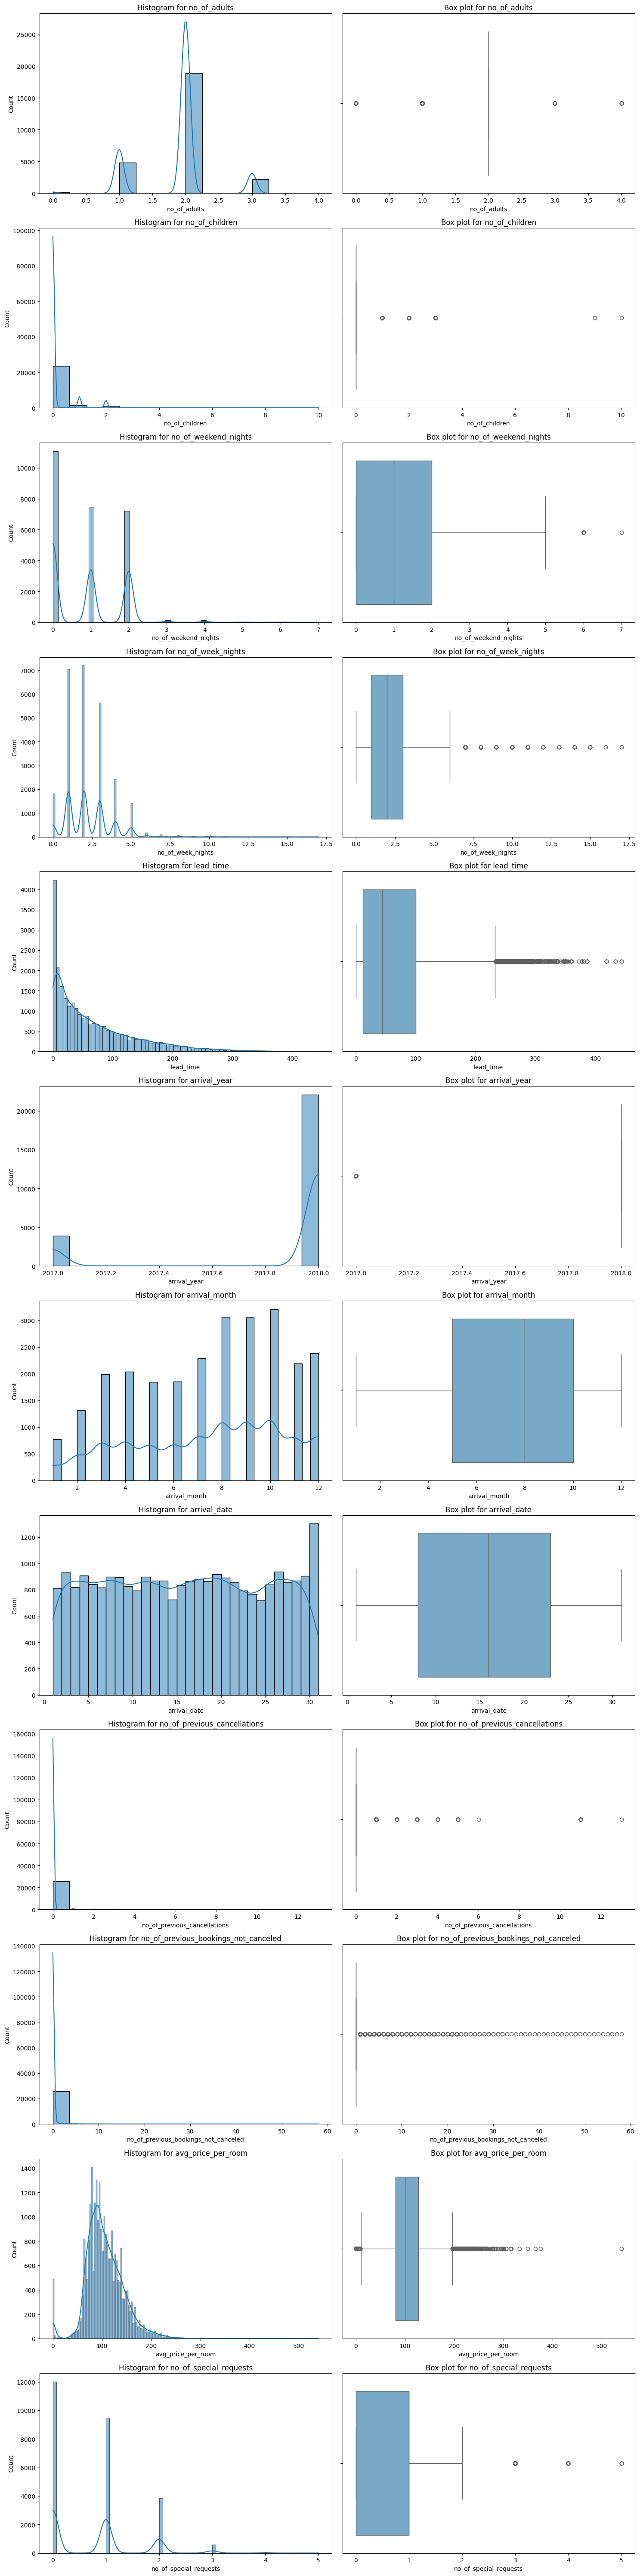

In [34]:
num_plot_dist(df, num_cols)

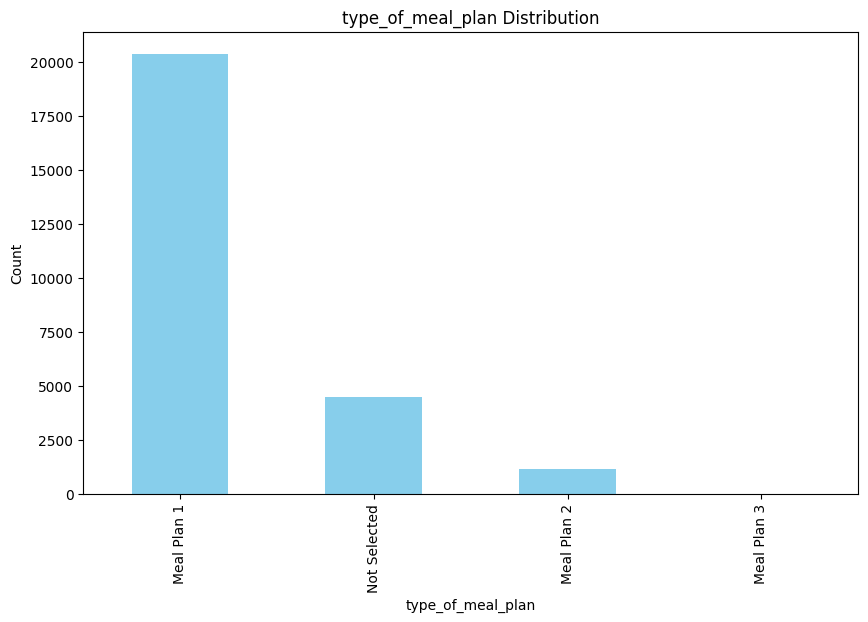

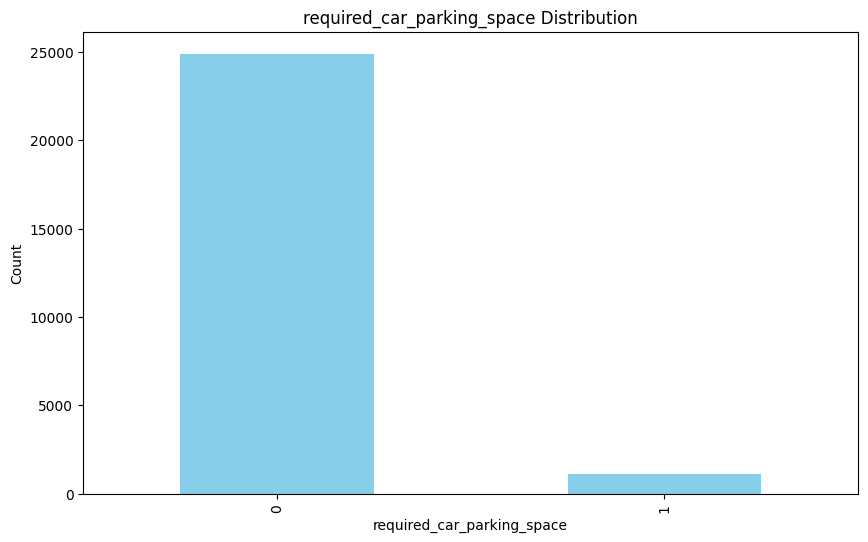

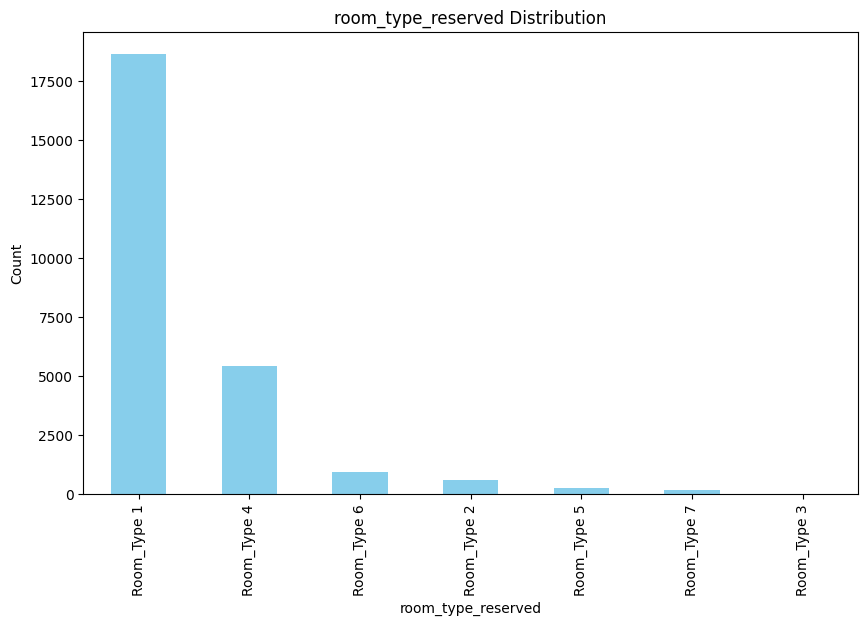

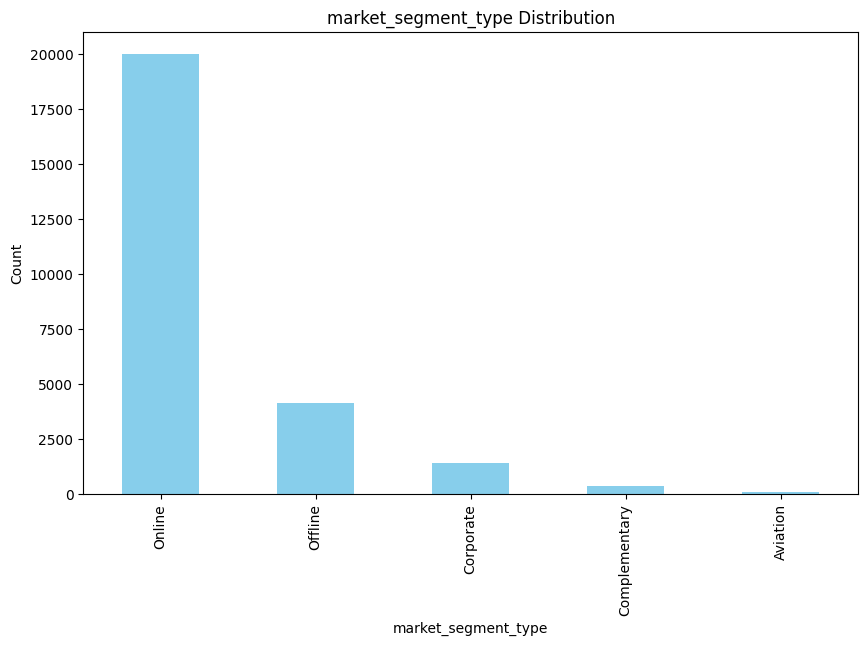

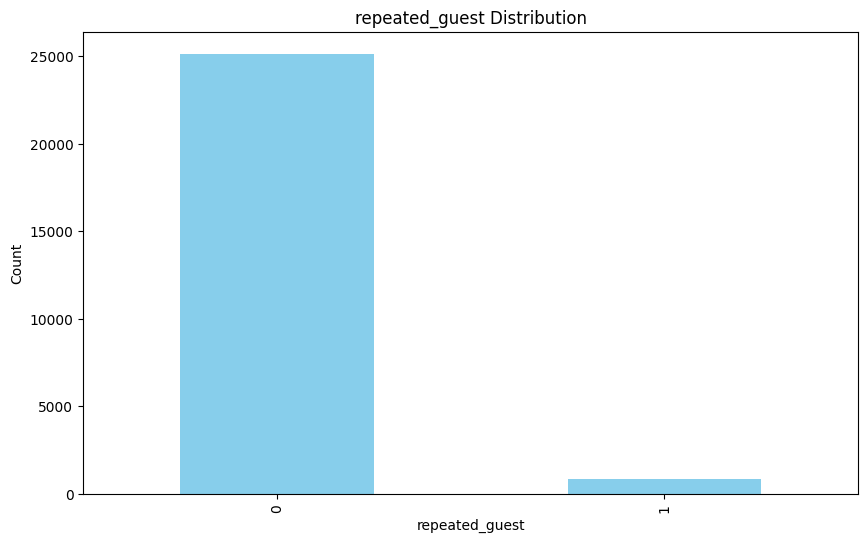

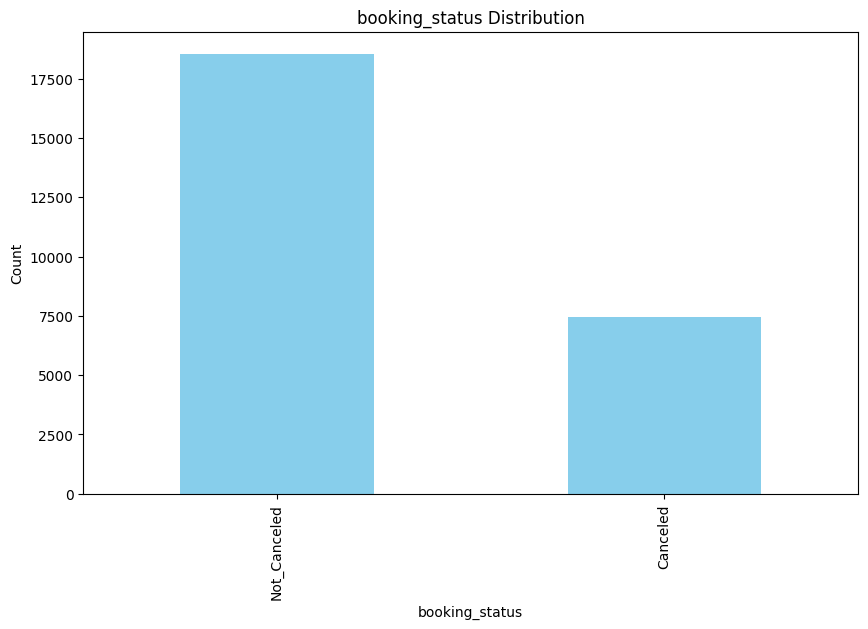

In [36]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    df[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')

Bivariate Analysis 

In [37]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()


    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i],data=df, palette='Blues')
        axes[i].set_title(f'{column} VS {target}')

    plt.tight_layout()

    plt.show()

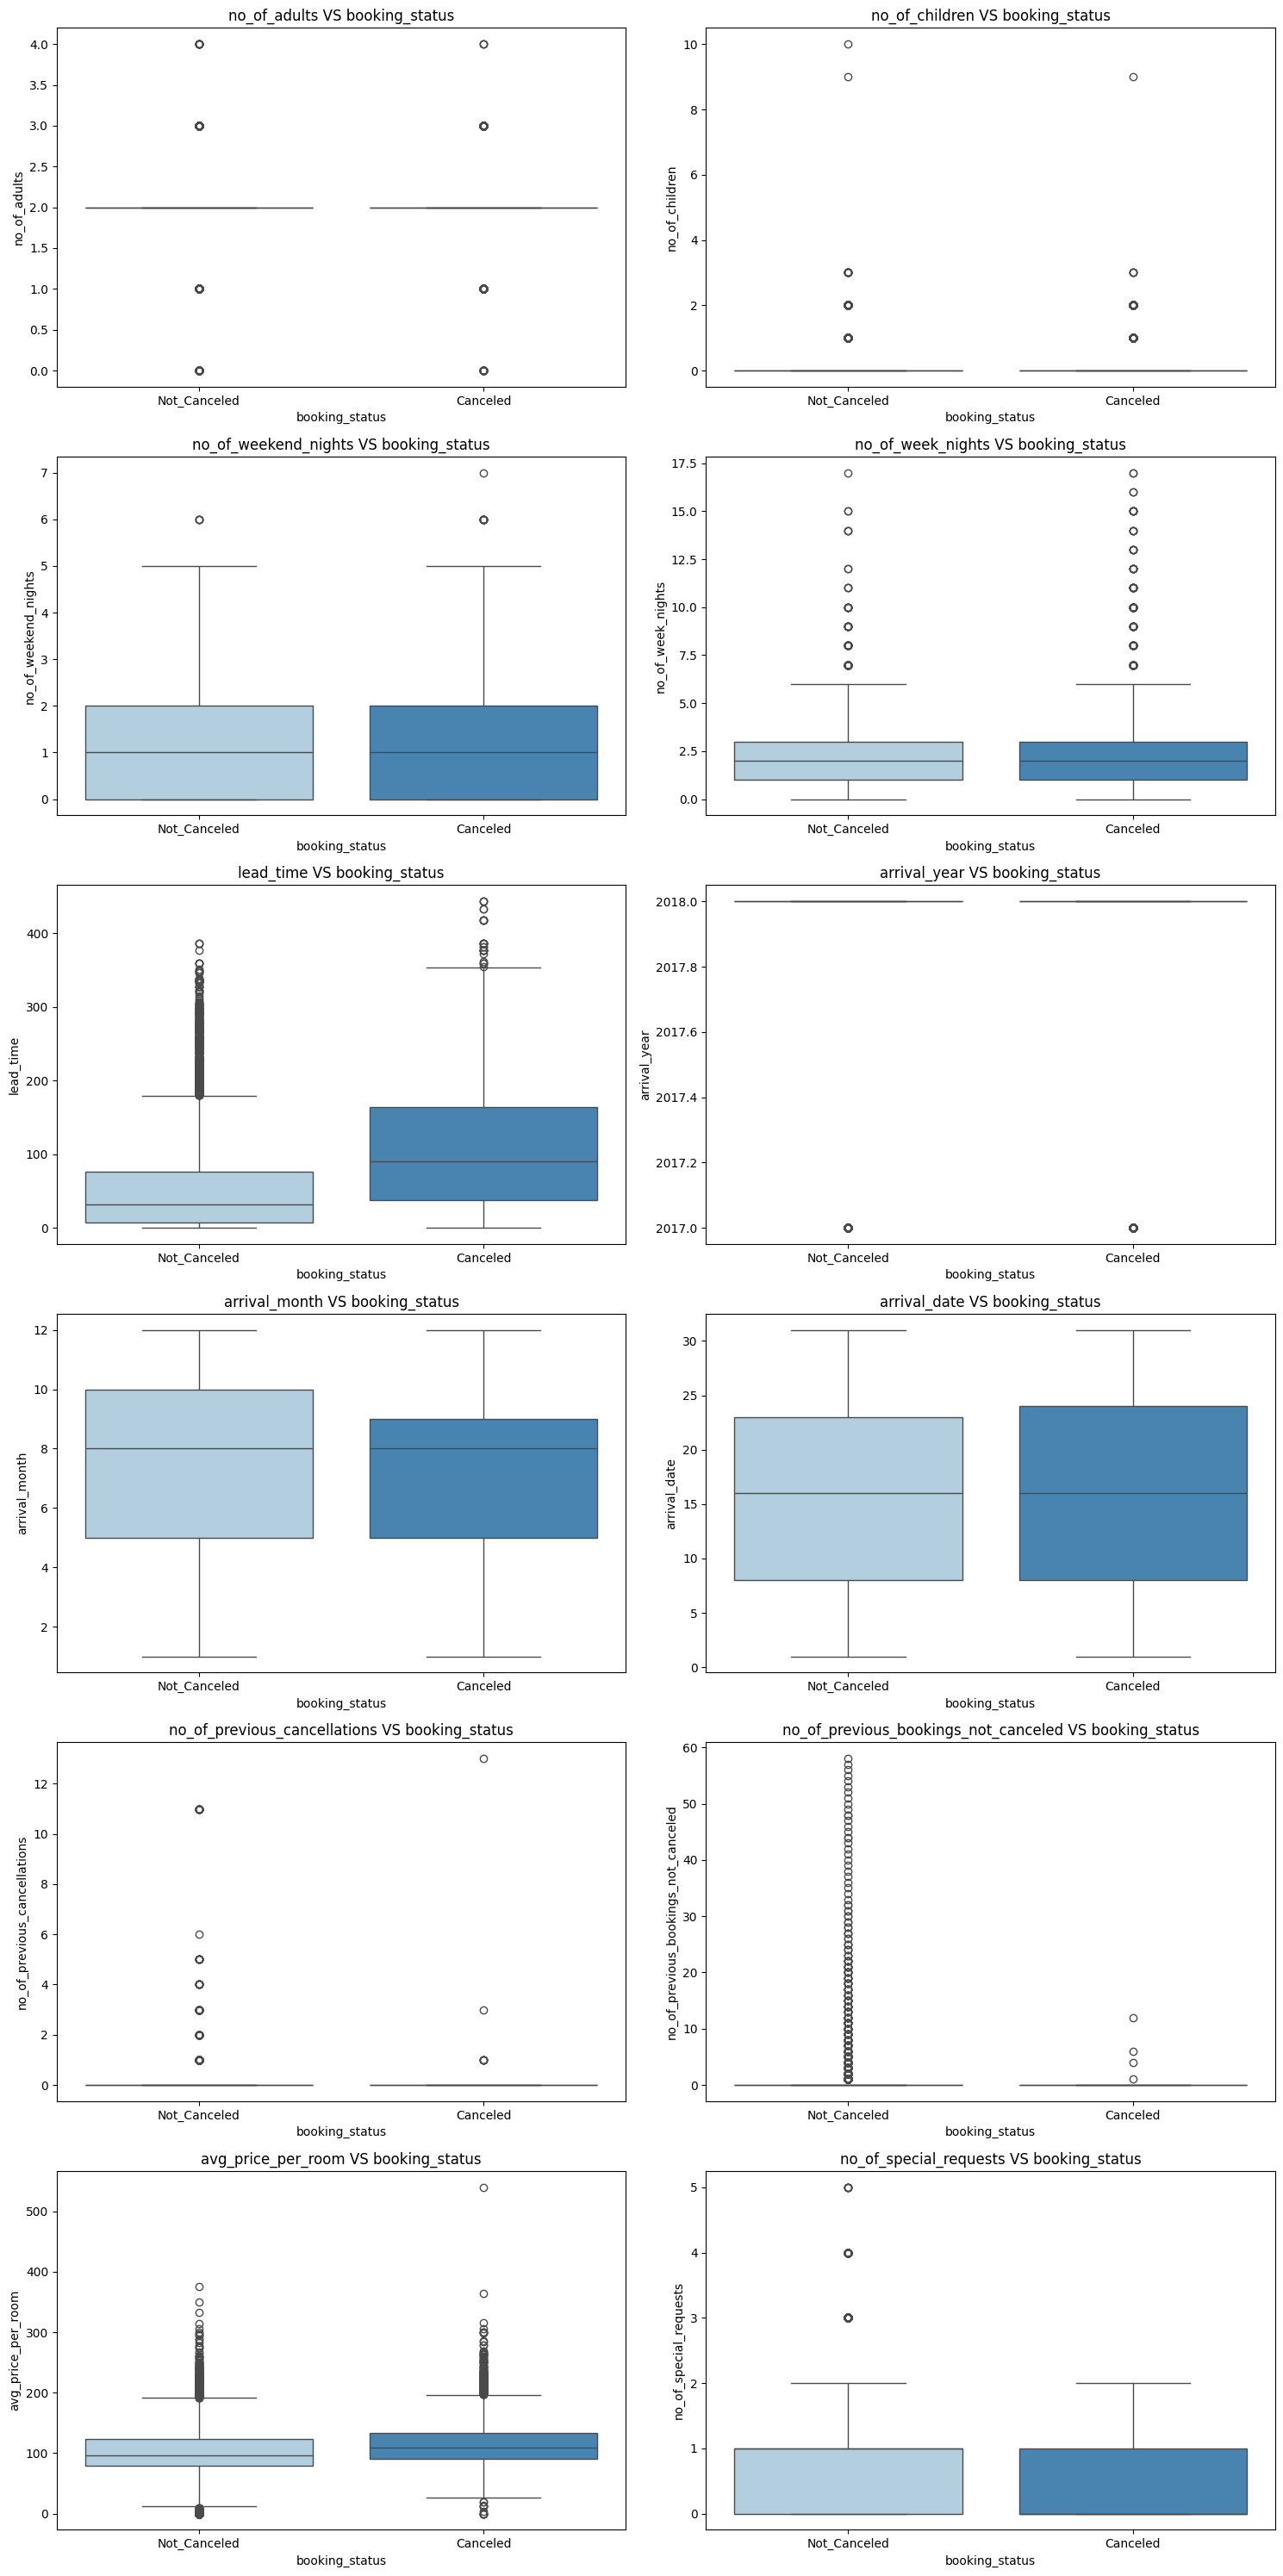

In [38]:
plot_bivariate_num(df, 'booking_status',num_cols)

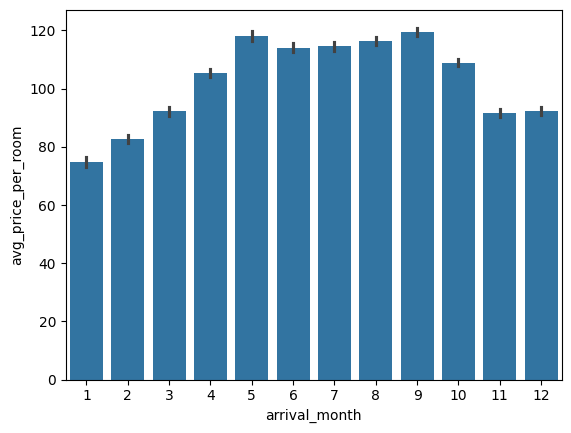

In [39]:
sns.barplot(x='arrival_month',y='avg_price_per_room', data=df)
plt.show()

In [40]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()


    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette='Set2', ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

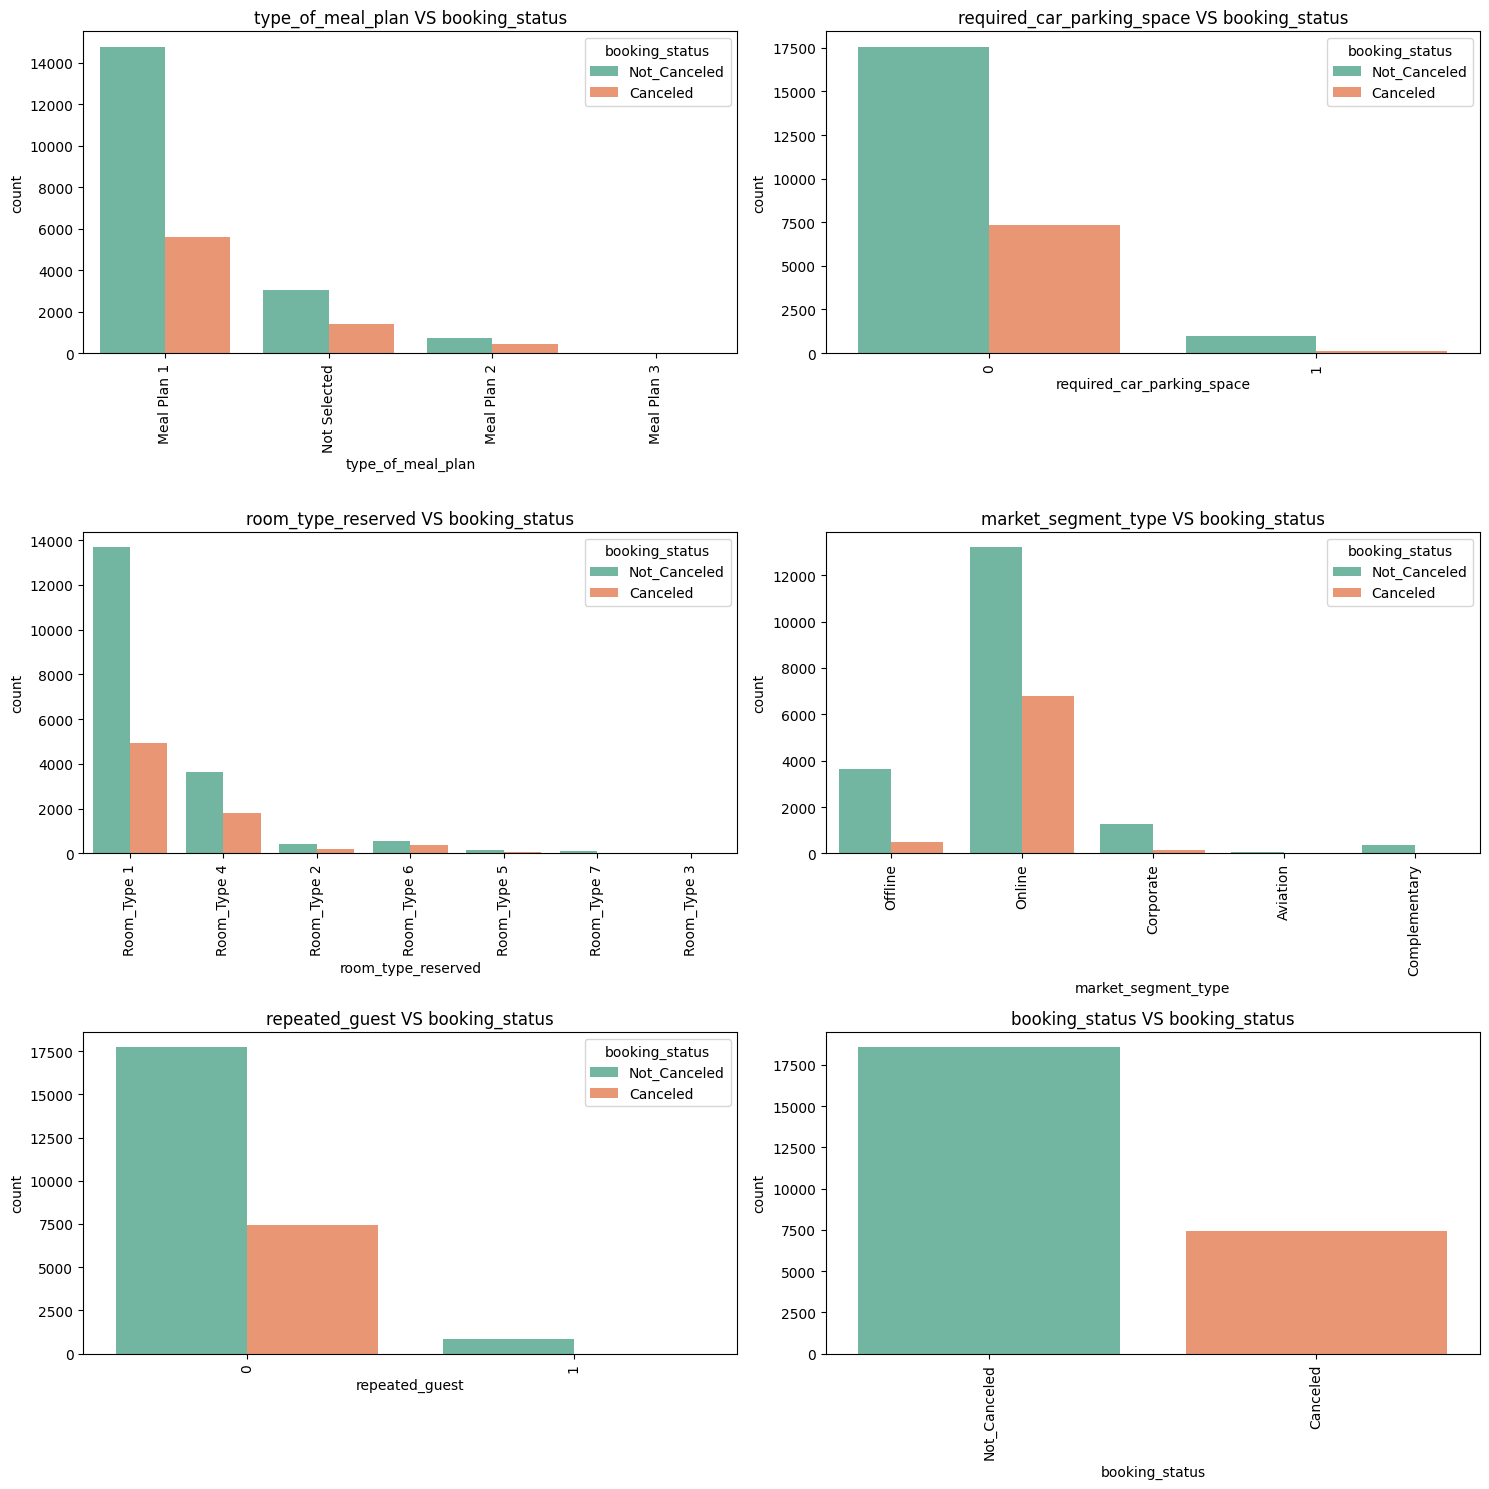

In [41]:
plot_bivariate_cat(df, 'booking_status',cat_cols)

Data Processing

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [45]:
## Label encoding 

from sklearn.preprocessing import LabelEncoder 


In [46]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


In [47]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [48]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------------------- ------------------ 5.2/9.9 MB 31.9 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 29.2 MB/s eta 0:00:00


In [49]:
## Multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 


In [52]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [53]:
vif_data

,feature,VIF
0,const,4.129913e+07
1,no_of_adults,1.337855e+00
2,no_of_children,1.284896e+00
3,no_of_weekend_nights,1.077614e+00
4,no_of_week_nights,1.131223e+00
5,type_of_meal_plan,1.177405e+00
6,required_car_parking_space,1.032967e+00
7,room_type_reserved,1.555871e+00
8,lead_time,1.411162e+00
9,arrival_year,1.291251e+00


Data Does not have multicolinearity

<Axes: >

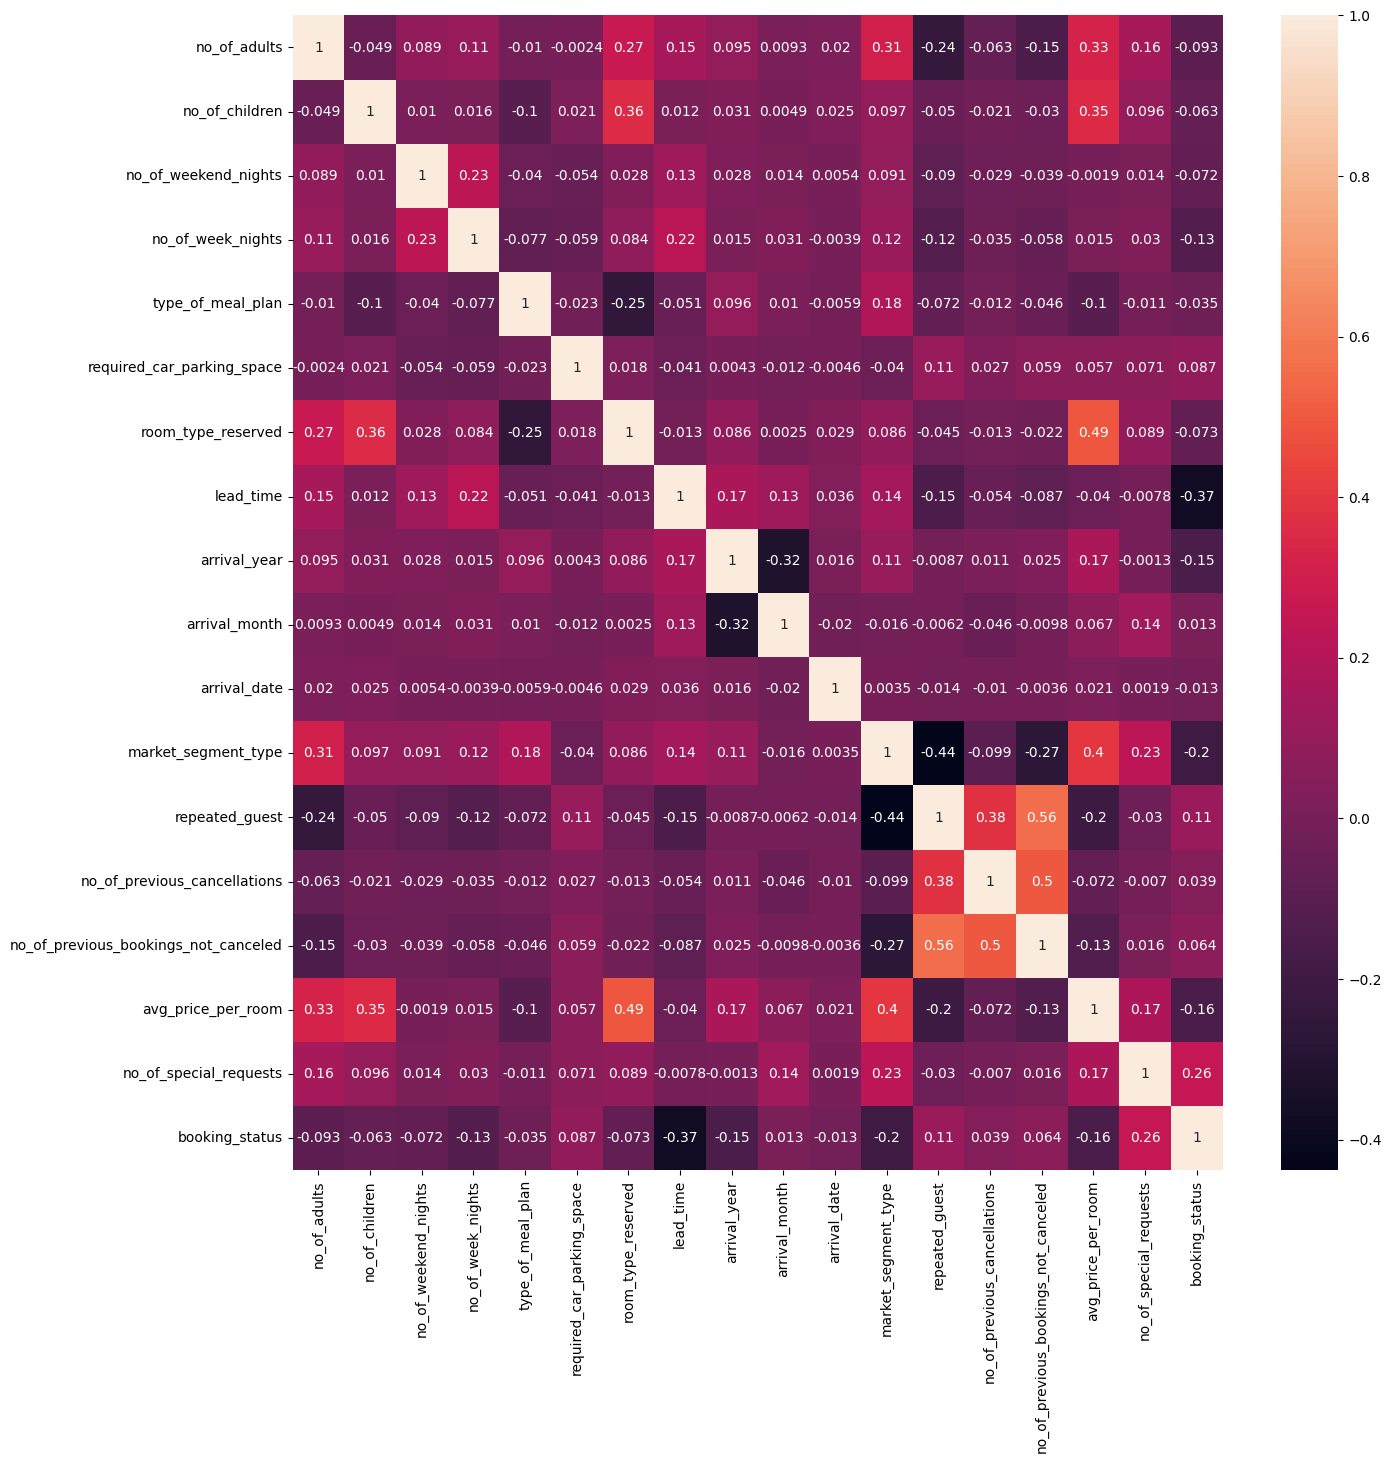

In [58]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [59]:
## Skewness

In [64]:
skewness = df.skew()
skewness

no_of_adults                            -0.297021
no_of_children                           4.005672
no_of_weekend_nights                     0.659718
no_of_week_nights                        1.601870
type_of_meal_plan                        1.638645
required_car_parking_space               4.559677
room_type_reserved                       1.373156
lead_time                                1.407857
arrival_year                            -1.963466
arrival_month                           -0.292238
arrival_date                             0.012177
market_segment_type                     -2.382309
repeated_guest                           5.249142
no_of_previous_cancellations            13.260942
no_of_previous_bookings_not_canceled     7.537942
avg_price_per_room                       0.588413
no_of_special_requests                   0.911121
booking_status                          -0.945939
dtype: float64

In [63]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [65]:
## Imbalanced Data

In [66]:
df["booking_status"].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [67]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [68]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [69]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36269    0
36270    1
36271    0
36272    1
36273    0
Name: booking_status, Length: 26000, dtype: int64

In [70]:
!pip install imbalanced-learn

In [71]:
y.value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE 

In [73]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y)

In [74]:
X_res

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0.0,0.0,0.0,65.000000,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0.0,0.0,0.0,106.680000,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0.0,0.0,0.0,60.000000,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0.0,0.0,0.0,100.000000,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0.0,0.0,0.0,94.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37111,2,0,0,4,0,0,3,120,2018,9,20,4,0.0,0.0,0.0,143.100000,0
37112,2,0,0,4,0,0,3,120,2018,4,4,4,0.0,0.0,0.0,94.872627,0
37113,1,0,0,3,1,0,0,129,2018,5,5,4,0.0,0.0,0.0,101.216522,0
37114,1,0,1,0,2,0,0,4,2018,9,2,4,0.0,0.0,0.0,139.583629,0


In [76]:
y_res.value_counts()

booking_status
1    18558
0    18558
Name: count, dtype: int64

In [77]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)

balanced_df['booking_status'] = y_res 

balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0.0,0.0,0.0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0.0,0.0,0.0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0.0,0.0,0.0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0.0,0.0,0.0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0.0,0.0,0.0,94.50,0,0


In [79]:
balanced_df.shape

(37116, 18)

In [80]:
df = balanced_df.copy()

In [81]:
len(df.columns)

18

Feature selection

In [82]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [83]:
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier(random_state=42)

model.fit(X,y)

RandomForestClassifier(random_state=42)

In [84]:
feature_importance = model.feature_importances_

In [85]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})
feature_importance_df

,feature,importance
0,no_of_adults,0.017920
1,no_of_children,0.006836
2,no_of_weekend_nights,0.029146
3,no_of_week_nights,0.044983
4,type_of_meal_plan,0.020791
5,required_car_parking_space,0.011800
6,room_type_reserved,0.018980
7,lead_time,0.264703
8,arrival_year,0.017115
9,arrival_month,0.084832


In [88]:
top_features_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [89]:
top10feature = top_features_df['feature'].head(10).values
top10df = df[top10feature.tolist() + ['booking_status']]
top10df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,224,0,65.000000,10,2,3,2,1,0,0,1
1,5,1,106.680000,11,6,4,3,2,3,0,1
2,1,0,60.000000,2,28,4,1,2,0,0,0
3,211,0,100.000000,5,20,4,2,0,0,0,0
4,48,0,94.500000,4,11,4,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37111,120,0,143.100000,9,20,4,4,0,0,3,0
37112,120,0,94.872627,4,4,4,4,0,0,3,0
37113,129,0,101.216522,5,5,4,3,0,1,0,0
37114,4,0,139.583629,9,2,4,0,1,2,0,0


In [90]:
len(top10df.columns)

11

In [91]:
df = top10df.copy()

Model Selection

In [92]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 7.3/124.9 MB 45.4 MB/s eta 0:00:03
   ------ --------------------------------- 20.4/124.9 MB 56.2 MB/s eta 0:00:02
   ---------- ----------------------------- 33.6/124.9 MB 57.6 MB/s eta 0:00:02
   -------------- ------------------------- 46.1/124.9 MB 58.7 MB/s eta 0:00:02
   ------------------ --------------------- 59.0/124.9 MB 58.7 MB/s eta 0:00:02
   ---------------------- ----------------- 71.0/124.9 MB 58.8 MB/s eta 0:00:01
   --------------------------- ------------ 84.4/124.9 MB 59.2 MB/s eta 0:00:01
   ------------------------------- -------- 97.8/124.9 MB 59.5 MB/s eta 0:00:01
   ---------------------------------- ---- 110.1/124.9 MB 59.6 MB/s eta 0:00:01
   --------------------------------------  122.9/124.9 MB 60.0 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 59.9 MB/s eta 0:00:01
   --------------------------------------- 124.9/1

In [93]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 




In [94]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [96]:
classifiers = {
    'RandomForest':RandomForestClassifier(random_state=42),
    'LogisticRegression':LogisticRegression(random_state=42),
    'GradientBoosting':GradientBoostingClassifier(random_state=42),
    'SVM CLF':SVC(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'KNN':KNeighborsClassifier(),
    'Naive bayes':GaussianNB(),
    'XGBoost':XGBClassifier(),
    'Lightgbm':LGBMClassifier(random_state=42),
    'adaboost':AdaBoostClassifier(random_state=42)
}

In [97]:
metrics = {
    "Model":[],
    "Accuracy":[],
    'precision_score':[],
    "recall_score":[],
    'f1_score':[]
    }

In [98]:
for model_name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    pre = precision_score(y_test, y_pred)
    
    recall = recall_score(y_test, y_pred)
    
    f1 = f1_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    
    metrics['Accuracy'].append(acc)
    
    metrics['precision_score'].append(pre)
    
    metrics['recall_score'].append(recall)
    metrics['f1_score'].append(f1)

In [99]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,precision_score,recall_score,f1_score
0,RandomForest,0.882543,0.877183,0.883938,0.880548
1,LogisticRegression,0.766298,0.784325,0.721122,0.751397
2,GradientBoosting,0.827990,0.808366,0.850385,0.828843
3,SVM CLF,0.730469,0.728416,0.716997,0.722661
4,Decision Tree,0.831627,0.838536,0.812706,0.825419
5,KNN,0.780442,0.839770,0.681793,0.752580
6,Naive bayes,0.767915,0.783240,0.727448,0.754313
7,XGBoost,0.867592,0.858610,0.873487,0.865985
8,Lightgbm,0.858836,0.840526,0.878438,0.859064
9,adaboost,0.801589,0.802856,0.788504,0.795615


In [100]:
## Train Randomforest model

In [101]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint



In [102]:
X = df.drop(columns='booking_status')
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [103]:
rf = RandomForestClassifier(random_state=42)

In [104]:
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap': [True, False]
}

In [105]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params_dist, n_iter=5, cv=5, verbose=2, random_state=42, scoring='accuracy')

In [106]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002782BC19C50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002782BC04CD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002782BC190D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002782BBFF390>},
                   random_state=42, scoring='accuracy', verbose=2)

In [107]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [108]:
best_rf_model = random_search.best_estimator_ 

In [109]:
y_pred = best_rf_model.predict(X_test)

In [110]:
acc = accuracy_score(y_test, y_pred)

pre = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f'acc:{acc}')
print(f'prec:{pre}')
print(f'recall:{recall}')
print(f'f1:{f1}')

acc:0.8795797413793104
prec:0.8705405405405405
recall:0.8858635863586358
f1:0.8781352235550709


In [111]:
## Save model 

In [112]:
import joblib 

joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [113]:
loaded_model = joblib.load('random_forest.pkl')

In [119]:
X_train.iloc[0].tolist()

[57.0, 0.0, 60.0, 11.0, 17.0, 3.0, 3.0, 0.0, 0.0, 3.0]

In [122]:
loaded_model.predict([X_train.iloc[0].tolist()])

array([1])